# **Scraping the Most Appreciated Projects from [BEHANCE]("www.behance.net") Website** 
#### *Using Python,Requests and Selenium - Scraping Top 40 Projects for different creative fields from Behance Website*

![](https://i.imgur.com/lvvbRmL.png)

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="web-scraping-Top-Projects-Behance")

<IPython.core.display.Javascript object>

![](https://i.imgur.com/VIWCXex.jpg)

Image credits - [Adobe Stock](https://stock.adobe.com/)




# **What is Web Scraping ?**

'Web Scraping' is the process of extracting data from the web automatically.web scraping extracts underlying HTML code and the data stored in a database.

This extracted data can be saved in a structured format in the the form of a `CSV or JSON file` and also in other formats


# **Behance Website**

'Behance' is a leading social media platform owned by Adobe whose main focus is to showcase and discover creative works (Architecture,Graphic Design, Illustration, Fashion, Photography, Advertising, Fine Arts, Game Design, and much more).'Behance' had over `10 million` creators.

Each month, thousands of creators are discovered on Behance for new job opportunities.In the past year, over 160 million people have visited Behance in search of inspiration and viewed work on Behance over 2.25 billion times

![](https://i.imgur.com/YmXvglL.jpg)

Behance is a open source social platform where creative professionals showcase their talent and
collect ideas.

Here, creators showcase their work in the form of Projects.

 A Project is a grouping of images, videos, and other digital content with a related theme or process. Every project has a unique URL that can be shared across the web, as well as a View and Appreciation counter so you can track how many people have seen your project and given you kudos on a job well done.

##**Scraping Top 40 Projects for different creative fields from Behance Website**


![](https://i.imgur.com/1MomnfK.jpg)

Image credits - [Matt Chinworth](https://www.behance.net/mattchinworth) from [Behance](https://www.behance.net)



You can check out more creative illustrations here on https://www.behance.net/mattchinworth

##### **Objective**:
Scraping the `All Time Most Appreciated 40 projects` in each creative field by parsing the information from this website in the form of Tabular data.

#####  **List of creative fields on website:**

1. Architecture
2. Art Direction
3. Branding
4. Fashion
5. Graphic Design
6. Illustration
7. Industrial Design
8. Interaction 
9. Motion Graphics
10. Photography
11. UI/UX
12. Web Design










![](https://i.imgur.com/yyTfADh.jpg)

## **Outline of the project:**
1. Understanding the structure of [Behance Website]("www.behance.net")
2. Installing and Importing required libraries 
3. Simulating the page and Extracting the URLs of different creative fields from website using `kora.selenium`
4. Accessing each field label and building a URL (Total 12 fields as listed above)
5. Parsing the Top 40 Project details into 6 fields: Project Title,Project Link,Creator Name,Creator Profile link,Likes,Views using Helper Functions.
6. Storing the extracted data into a dictionary.
7. Compiling all the data into a DataFrame using `Pandas` and saving the data  into `CSV` file.

By the end of the project we’ll create DataFrame in the following format:
![](https://i.imgur.com/P9Vy79T.jpg)


## **Experimenting with Python Library -  BeautifulSoup**

First import the `requests` and `BeautifulSoup` libraries.
We can use `get()` method from requests. 
The `get()` method for page_url returns a web object containing the data from web page.

In [ ]:
import  requests
from bs4 import BeautifulSoup 

#We use requests.get to download the content from a webpage
response = requests.get('https://www.behance.net/')

# checking the status of the response by response.status_code .
# A Valid url status code ranges between 200 to 299
print('Status Code:', response.status_code)

Status Code: 200


In [ ]:
#Writing the page contents into a html file
with open('top projects.html','w') as f:
    f.write(response.text)
# Converting the page to  Beautiful soup document using html.parser
doc = BeautifulSoup(response.text,'html.parser')

## **Since, Behance is a Dynamic Website - Selenium is preferred to locate Web Elements easily**

1. Behance is a dynamic website using javascript 
, therefore selenium is preferred to prevent the interruptions while fetching the data.Although We can also use Beautiful soup to scrape the data to certain extent but, However it fails to locate the elements in most cases.
2. If you want to code on you local machine install Selenium webdrivers and relevant webdriver for your browser to extract the page, But if you are coding on cloud based platform such as google colab then you can install kora Selenium in few steps.This kora Selenium may not work on other cloud platforms .
        * To use Selenium library on Google Colab, we will install `kora` 
        * From kora.selenium, we will import Selenium WebDriver import `wd`

### **1.Installing Kora.Selenium and Importing webdriver**

In [ ]:
!pip install kora -q
from kora.selenium import wd

     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 60 kB 8.2 MB/s 


We will use `wd.get()` to simulate to the web page

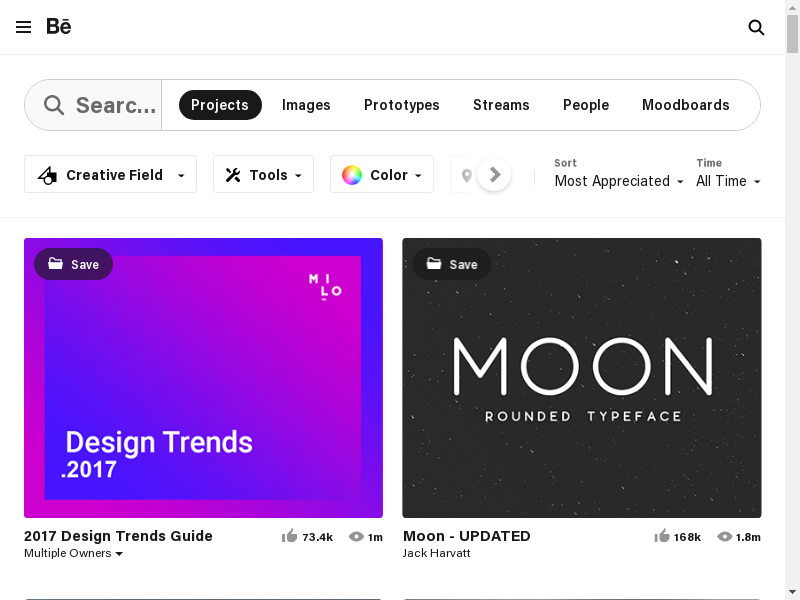

In [ ]:
base_url = 'https://www.behance.net/search/projects?sort=appreciations&time=all'
wd.get(base_url)
wd

##### **Defining a function to check the status code of the url using `requests` and `response.status_code`**

In [ ]:
def check_status_code(url):

  #We use requests.get to download the content from a webpage
  response = requests.get(url)

  # checking the status of the response by response.status_code .
  # A Valid url status code ranges between 200 to 299
  if not response.ok:
     raise Exception ('Failed to fetch the webpage')
  
  return response.status_code

#### **Before Extracting the data , Let's import** 

**`WebDriverWait`**- Some times WebDriver does not track the active web elements.In such cases WebdriverWait is applied on certain web element with defined waiting time and conditions to track the elements .

**`expected_conditions as EC`**-WebDriverWait in combination with ExpectedCondition will enable wait only as long as required

**`By`**- locates elements via attributes (class,tag,id)

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

### **2.Extracting the labels of different fields**

The URL of different fields are as follows:

Architecture - https://www.behance.net/search/projects?sort=appreciations&time=all&field=architecture

Art Direction - https://www.behance.net/search/projects?sort=appreciations&time=all&field=art%20direction

We need to build the url by string concatenation of `base url` and `label` replace ' ' with '%20' in the label to access the page url

- In Selenium automation, there may be times when elements cannot be found with general locators like ID, name, class, etc. And this is when XPath is used to locate those elements on the webpage. XPath in Selenium may be used on both XML and HTML documents.
- To get the class name, right click on the button and select “Inspect Elements” and hover over the button to locate the class name.

In [ ]:
# Finding the <ul_tags to access the list of creative fields
ul_tags = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//*[@class="creativeFieldsList"]')))

# Accessing each field from the <label tags
field_label = ul_tags[0].find_elements(By.TAG_NAME,"label")

# print(f'Found {len(field_labels) creative fields')

Now, to extract the text of field labels, we need to loop over the list that contains WebElement and use the `.get_attribute()` passing innerHTML



In [ ]:
fields_list =[]
for i in field_label[1:]:
  # The URL are in the format 
  fields_list.append((i.get_attribute("textContent").strip()).replace(' ','%20'))

In [ ]:
fields_list

['Architecture',
 'Art%20Direction',
 'Branding',
 'Fashion',
 'Graphic%20Design',
 'Illustration',
 'Industrial%20Design',
 'Interaction%20Design',
 'Motion%20Graphics',
 'Photography',
 'UI/UX',
 'Web%20Design']

Now, we have the list of different fields. Let's build an URL for each field.

### **3.URL Making - For each different field**



`base_url = "https://www.behance.net/search/projects?sort=appreciations&time=all&field=" + _____________ ` 

In [ ]:
#Helper function to build the url
def get_field_page(field):

  base_url_1 = "https://www.behance.net/search/projects?sort=appreciations&time=all&field=" 
        
  #Constructing the URL
  field_page_url = base_url_1 + field 
        
  return field_page_url

Let's get a list of links using `for loop` iterating over the fields_list

In [ ]:
#Helper function to iterate over a list of labels and build urls for each one of them
def get_field_url(fields_list):
  links = []
  for field in fields_list:
    links.append(get_field_page(field))
  return links 

In [ ]:
field_links = get_field_url(fields_list)
field_links


['https://www.behance.net/search/projects?sort=appreciations&time=all&field=Architecture',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Art%20Direction',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Branding',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Fashion',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Graphic%20Design',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Illustration',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Industrial%20Design',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Interaction%20Design',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Motion%20Graphics',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&field=Photography',
 'https://www.behance.net/search/projects?sort=appreciations&time=all&fie

Looping over all the above field_links to check the response status by calling the function `check_status_code`

In [ ]:
status_code =[]
for link in field_links:
  status_code.append(check_status_code(link))
status_code

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]

### **4.Accessing the Top 40 projects from the first field - Architecture**

---



Each projects are linked to the `<li_tags>` with `class_name ="ContentGrid-gridItem-VXS e2e-ContentGrid-item"`as shown in the below image
![](https://i.imgur.com/Mr54ITw.png)

We use `wd.get()` to access the web elements and storing them in a variable `project_tags`

In [ ]:
wd.get('https://www.behance.net/search/projects?sort=appreciations&time=all&field=Architecture')
project_tags = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//*[@class="ContentGrid-gridItem-VXS e2e-ContentGrid-item"]')))
len(project_tags)

48

##### **Accessing top 40 projects through and Extracting the details from `<project_tags>` using the for loop**




- Each project is having Project Title,Project Link,Creator Name ,Creator Link,Likes,Views etc

- Looking closely, we can see that Few projects have Multiple owners and the `creator names` and `creator link` tags are masked. For now, we will print "Multiple owners" instead of scraping the details using the if-else condition 

- **Helper Function to extract the project title**

In [ ]:
def get_project_title(project_tags):

  project_title=[]  #creating an empty list to store project titles

  for tag in project_tags[:40]:
    # project titles are present in `<a>` tags and `.text` method is used to extract the text
    a1_tag = tag.find_elements(By.TAG_NAME,'a')
    proj_title =a1_tag[-2].text
    # Using if condition - If there is a single owner then `if` gets executed and in case of multiple owners `else` gets executed
    if proj_title:
      project_title.append(proj_title)
    else:
      project_title.append(a1_tag[-1].text)
  
  return project_title

In [ ]:
get_project_title(project_tags)[:5]

- **Helper Function to extract the project link**

In [ ]:
def get_project_link(project_tags):

  project_link = []  #creating an empty list to store project links
  
  for tag in project_tags[:40]:
    # project links are present in `<a>` tags and `[href]` method is used to extract the link
    a1_tag = tag.find_elements(By.TAG_NAME,'a')
    proj_title =a1_tag[-2].text
    proj_link = a1_tag[-2]['href']

    if proj_title:
      project_link.append(proj_link)
    else:
      project_link.append(a1_tag[-1]['href'])
  
  return project_link


In [ ]:
get_project_link(project_tags)[:5]

- **Helper Function to extract the creator name**

In [ ]:
def get_creator_name(project_tags):

  creator_name = []  #creating an empty list to store creator names
  
  for tag in project_tags[:40]:
    # creator names are present in `<a>` tags and `.text` method is used to extract the text
    a1_tag = tag.find_elements(By.TAG_NAME,'a')
    proj_title =a1_tag[-2].text
    
    # Using if condition - If there is a single owner then `if` gets executed and in case of multiple owners `else` gets executed
    if proj_title:
      creator_name.append(a1_tag[-1].text)
    else:
      creator_name.append("Multiple Owners")
  
  return creator_name

In [ ]:
get_creator_name(project_tags)[:5]

- **Helper Function to extract the creator link**

In [ ]:
def get_creator_link(project_tags):

  creator_link = []  #creating an empty list to store creator links
  
  for tag in project_tags[:40]:
    # creator links are present in `<a>` tags and `[href]` method is used to extract the links
    a1_tag = tag.find_elements(By.TAG_NAME,'a')
    proj_title =a1_tag[-2].text
    if proj_title:
      creator_link.append(a1_tag[-1]['href'])
    else:
      creator_link.append("Multiple Owners")
  
  return creator_link

In [ ]:
get_creator_link(project_tags)[:5]

- **Helper Function to extract the number of likes**

In [ ]:
def get_likes(project_tags):

  likes = []  #creating an empty list to store likes
  
  for tag in project_tags[:40]:
    # Likes are present in `<span>` tags and `.text` method is used to extract the text
    span_tag = tag.find_elements(By.TAG_NAME,'span')
    likes.append(span_tag[-2].text)

   # Using for loop to remove 'k' from '12.5k'
    no_of_likes = []
    for like in likes:
      if like[-1] == 'k':
        no_of_likes.append(int(float(like[:-1])*1000))

  return no_of_likes

In [ ]:
get_likes(project_tags)[:5]

- **Helper Function to extract number of views**

In [ ]:
def get_views(project_tags):

  views = []  #creating an empty list to store views
  
  for tag in project_tags[:40]:
    # Views are present in `<span>` tags and `.text` method is used to extract the text
    span_tag = tag.find_elements(By.TAG_NAME,'span')
    views.append(span_tag[-1].text)

    # Using for loop to remove 'k' from '12.5k'
    no_of_views = []
    for view in views:
      if view[-1] == 'k':
        no_of_views.append(int(float(view[:-1])*1000))

  return no_of_views

In [ ]:
get_views(project_tags)[:5]

### **5.Storing all the Extracted data into a Dictionary**

In [ ]:
def get_all_details(project_tags):

    #using get_project_title function to extract project_title
  projecttitle = get_project_title(project_tags)
    #using get_project_link function to extract project_link
  projectlink = get_project_link(project_tags)
    #using get_creator_name function to extract creator_name
  creatorname = get_creator_name(project_tags)
    #using get_creator_link function to extract creator_link
  creatorlink = get_creator_link(project_tags)
    #using get_likes function to extract creator_link
  no_oflikes = get_likes(project_tags)
  no_ofviews = get_views(project_tags)

  return{
      "Project Title": projecttitle,
      "Project Link": projectlink,
      "Creator Name": creatorname,
      "Creator Link": creatorlink,
      "Likes": no_oflikes,
      "Views": no_ofviews
  }
  

In [ ]:
#get_all_details(project_tags) 

### **6.Creating a Data Frame using Pandas Library**

In [ ]:
import pandas as pd
field1_df = pd.DataFrame(get_all_details(project_tags))
field1_df.index += 1

In [ ]:
field1_df

,Project Title,Project Link,Creator Name,Creator Link,Likes,Views
1,Tōkyō desu,https://www.behance.net/gallery/31547413/Tokyo...,Nina Geometrieva,https://www.behance.net/geometrieva?tracking_s...,12500,125100
2,Gallery,https://www.behance.net/gallery/5152437/Galler...,Gediminas Pranckevicius,https://www.behance.net/gedomenas?tracking_sou...,11400,82400
3,The Hungarian Guggenheim,https://www.behance.net/gallery/17449717/The-H...,Multiple Owners,Multiple Owners,11000,96800
4,Mirages,https://www.behance.net/gallery/65996821/Mirag...,Romain Trystram®,https://www.behance.net/romaintrystram?trackin...,10400,92700
5,Material Studies: Metals,https://www.behance.net/gallery/35636521/Mater...,Jarrod Hasenjager,https://www.behance.net/hasenjager?tracking_so...,10000,120500
6,City Layouts,https://www.behance.net/gallery/24276859/City-...,Luis Dilger,https://www.behance.net/luisdilger?tracking_so...,9600,124600
7,architecture 1,https://www.behance.net/gallery/9493557/archit...,Sunga Park,https://www.behance.net/parksunga?tracking_sou...,8900,76600
8,Towers of The Netherlands,https://www.behance.net/gallery/30333405/Tower...,Coen Pohl,https://www.behance.net/coenpohl?tracking_sour...,7000,67800
9,Montero,https://www.behance.net/gallery/5390705/Monter...,Anagrama Studio,https://www.behance.net/Anagrama?tracking_sour...,8700,124800
10,HOME,https://www.behance.net/gallery/63498577/HOME?...,Muhammed Sajid,https://www.behance.net/muhammedsajid?tracking...,6400,37700


### **7.Parsing the Data from Each Field and saving all the data into a .csv file**

In [ ]:
import time
from time import sleep

In [ ]:
def get_all_fields(field_links):
  dict1 = {"Project Title": [],
           "Project Link": [],
           "Creator Name": [],
           "Creator Link": [],
           "Likes": [],
           "Views": []}

  for i in field_links:
     wd.get(i)
     time.sleep(5)
     project_tags = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//*[@class="ContentGrid-gridItem-VXS e2e-ContentGrid-item"]')))
     dict1["Project Title"].extend(get_project_title(project_tags))
     dict1["Project Link"].extend(get_project_link(project_tags))
     dict1["Creator Name"].extend(get_creator_name(project_tags))
     dict1["Creator Link"].extend(get_creator_link(project_tags))
     dict1["Likes"].extend(get_likes(project_tags))
     dict1["Views"].extend(get_views(project_tags))

  return dict1
  

In [ ]:
get_all_fields(field_links) 

In [ ]:
df = pd.DataFrame.from_dict(get_all_fields(field_links), orient='index') # orient ='index' fills all the missing values with `NaN`
df = df.transpose()
df.index += 1

In [ ]:
df

,Project Title,Project Link,Creator Name,Creator Link,Likes,Views
1,Tōkyō desu,https://www.behance.net/gallery/31547413/Tokyo...,Nina Geometrieva,https://www.behance.net/geometrieva?tracking_s...,12500,125100
2,Gallery,https://www.behance.net/gallery/5152437/Galler...,Gediminas Pranckevicius,https://www.behance.net/gedomenas?tracking_sou...,11400,82400
3,The Hungarian Guggenheim,https://www.behance.net/gallery/17449717/The-H...,Multiple Owners,Multiple Owners,11000,96800
4,Mirages,https://www.behance.net/gallery/65996821/Mirag...,Romain Trystram®,https://www.behance.net/romaintrystram?trackin...,10400,92700
5,Material Studies: Metals,https://www.behance.net/gallery/35636521/Mater...,Jarrod Hasenjager,https://www.behance.net/hasenjager?tracking_so...,10000,120500
...,...,...,...,...,...,...
476,Tofu Design - Website & Identity,https://www.behance.net/gallery/68257851/Tofu-...,Multiple Owners,Multiple Owners,11400,None
477,Redesigning the Website of IKEA,https://www.behance.net/gallery/28015103/Redes...,Ekrem Ates,https://www.behance.net/ekremates?tracking_sou...,12200,None
478,Inty++,https://www.behance.net/gallery/26592367/Inty?...,Multiple Owners,Multiple Owners,11600,None
479,Health Fitness Mobile App UI UX Kit,https://www.behance.net/gallery/78953297/Healt...,Grace Saraswati,https://www.behance.net/gracesaraswati?trackin...,11600,None


In [ ]:
df.to_csv('/content/FinalScrape480.csv',index=False)

# **Summary**

- The Scraping was done using Python libraries such as Requests, Selenium for extracting the data
- Scraping Top 40 project details from 12 different fields on Behance website like Project Title, Project Link, Creator Name, Creator Link, Likes and Views.
- Parsed all the scraped data into a csv file containing 40 rows and 6 columns for each creative field and a total of 480 rows and 6 columns.

# **Future work**

- Extracting more details of the project and creator by accessing the `project links` and `creator links`
- Code optimization
- Improving the documentation part of the project
- Adding a time and date stamp at the point when website's page is requested and adding it to the output, as the web page is dynamic and frequently changes data and adding new projects.

*Note :The public Behance API is no longer accepting new clients.
If you are a current API user, you will still be able to edit and access the content returned by the API*

# **References**

https://www.behance.net/

https://www.behance.net/mattchinworth

https://en.wikipedia.org/wiki/Behance

https://stock.adobe.com/



In [7]:
jovian.commit(project="web-scraping-Top-Projects-Behance")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pravz149/web-scraping-top-projects-behance


'https://jovian.ai/pravz149/web-scraping-top-projects-behance'